# Merino-Welsh optimization

In [1]:
def gamma(x,s,d):
    return ((x+d)*s)/((x+d)*s+(d+1)*x*(1-s))

In [2]:
def G(d,x,s,gam):
    return ((x+d)/(d+1)*s+x*(1-s))*(s-s/(d+1)*gam^d)

def Ginf(x,s):
    return (s+x*(1-s))*s

### Idea 1

Here x,s are chosen such a way that G(d,x,s,gamma(x,s,1)) are at least 1 for all d.

In [3]:
x=(3+sqrt(5))/2
print("x:", N(x))
s=(6+2*sqrt(5))/(7+3*sqrt(5))
print("s:", N(s))
print("___________")
for d in range(1,12):
    print(d, G(d,x,s,gamma(x,s,1)).n())
print("Infty:", Ginf(x,s).n())
print("___________")
d=9
print((((x-1)/(x*(d+2)))^(1/(d-1))).n(), "is larger than", gamma(x,s,1).n())
print("From d=9 the sequence is decreasing, so the smallest one from that point on is Ginf(x,s).")

x: 2.61803398874989
s: 0.763932022500210
___________
1 1.00000000000000
2 1.15236921034711
3 1.18525033351524
4 1.18783805465536
5 1.18125856327950
6 1.17211090590244
7 1.16272735027462
8 1.15394531114347
9 1.14602516001225
10 1.13899595137302
11 1.13279660374225
Infty: 1.05572809000084
___________
0.697754200002561 is larger than 0.690983005625053
From d=9 the sequence is decreasing, so the smallest one from that point on is Ginf(x,s).


### Idea 2

We observe that a degree 1 vertex cannot be adjacent to another degree one vertex if H is connected and has at least three vertices.
Here x,s are chosen such a way that G(1,x,s,gamma(x,s,2)) is  at least 1 and G(d,x,s,gamma(x,s,1)) for all d at least 2.

In [4]:
x=2.54
print("x:", N(x))
s=0.76
print("s:", N(s))
print("___________")
print(1,G(1,x,s,gamma(x,s,2)).n())
for d in range(2,12):
    print(d, G(d,x,s,gamma(x,s,1)).n())
print("Infty:", Ginf(x,s).n())
print("___________")
d=9
print((((x-1)/(x*(d+2)))^(1/(d-1))).n(), "is larger than", gamma(x,s,1).n())
print("From d=9 the sequence is decreasing, so the smallest one from that point on is Ginf(x,s).")

x: 2.54000000000000
s: 0.760000000000000
___________
1 1.00015021063798
2 1.12628760116317
3 1.16035420716839
4 1.16413305093218
5 1.15856178434317
6 1.15024896467994
7 1.14155987842924
8 1.13336130037553
9 1.12593636935915
10 1.11933141925454
11 1.11349857234605
Infty: 1.04089600000000
___________
0.696084222120124 is larger than 0.688152240638428
From d=9 the sequence is decreasing, so the smallest one from that point on is Ginf(x,s).


### Idea 3

We observe that it is completely enough if the contribution of a degree one vertex is cancelled out by its neighbor. Any vertex can have at most two leaf neigbors.

In [5]:
x=2.36
print("x:", N(x))
s=0.78
print("s:", N(s))
print("___________")
print("The second numbers show that a degree d vertex is able to cancel the contribution of its leaf neighbors.")
print("We only check it till d=45, since after that even Ginf(x,s) is able to cancel the contribution of its leaf neigbors.")
for d in range(2,45):
    print(d, G(d,x,s,gamma(x,s,1)).n(), (G(d,x,s,gamma(x,s,1)).n()*G(1,x,s,gamma(x,s,d))^(min(2,d-1))).n())
print("Infty:", Ginf(x,s).n(), (Ginf(x,s)*G(1,x,s,gamma(x,s,d))^2).n())
print("___________")
d=11
print((((x-1)/(x*(d+2)))^(1/(d-1))).n(), "is larger than", gamma(x,s,1).n())
print("From d=11 the sequence is decreasing, so the smallest one from that point on is Ginf(x,s).")

x: 2.36000000000000
s: 0.780000000000000
___________
The second numbers show that a degree d vertex is able to cancel the contribution of its leaf neighbors.
We only check it till d=45, since after that even Ginf(x,s) is able to cancel the contribution of its leaf neigbors.
2 1.06874465202436 1.00215345922882
3 1.10815264651986 1.00086197145259
4 1.11681913369317 1.02640833194772
5 1.11511667337790 1.03743759976094
6 1.10975849131510 1.04182882517377
7 1.10330750172561 1.04300865188036
8 1.09680798068072 1.04261001534334
9 1.09068230467836 1.04145583550358
10 1.08508115163529 1.03997408296620
11 1.08003342261565 1.03838980790695
12 1.07551442455619 1.03682008545765
13 1.07147798879121 1.03532329657452
14 1.06787176471043 1.03392562797224
15 1.06464436189708 1.03263568251503
16 1.06174845715582 1.03145266567088
17 1.05914189550910 1.03037100870249
18 1.05678781157173 1.02938297688227
19 1.05465429794750 1.02848012326838
20 1.05271389121446 1.02765407635358
21 1.05094301234842 1.02689694

### Idea 4

We observe that a degree d vertex has at most two degree 1 neighbors and built it into the modification of the function G(d,x,s,gam).

In [6]:
def G2(d,x,s,gam1,gam2):
    return ((x+d)/(d+1)*s+x*(1-s))*(s-s/(d+1)*gam1^min(2,d-1)*gam2^(d-min(2,d-1)))


In [7]:
x=2.355
print("x:", N(x))
s=0.78
print("s:", N(s))
print("___________")
print("The second numbers show that a degree d vertex is able to cancel the contribution of its leaf neighbors.")
print("We only check it till d=100, since after that even Ginf(x,s) is able to cancel the contribution of its leaf neigbors.")
for d in range(2,100):
    print(d, G2(d,x,s,gamma(x,s,1),gamma(x,s,2)).n(), (G2(d,x,s,gamma(x,s,1),gamma(x,s,2)).n()*G(1,x,s,gamma(x,s,d))^(min(2,d-1))).n())
print("Infty:", Ginf(x,s).n(), (Ginf(x,s)*G(1,x,s,gamma(x,s,d))^2).n())
print("___________")
d=11
print((((x-1)/(x*(d+2)))^(1/(d-1))).n(), "is larger than", gamma(x,s,1).n())
print("From d=11 the sequence is decreasing, so the smallest one from that point on is Ginf(x,s).")

x: 2.35500000000000
s: 0.780000000000000
___________
The second numbers show that a degree d vertex is able to cancel the contribution of its leaf neighbors.
We only check it till d=100, since after that even Ginf(x,s) is able to cancel the contribution of its leaf neigbors.
2 1.07641984643180 1.00750701821492
3 1.11135556808369 1.00001551323253
4 1.12051595966294 1.02591566665079
5 1.11815485337910 1.03629473774471
6 1.11192862150501 1.03985270835852
7 1.10468853332594 1.04027529602599
8 1.09755066213067 1.03926180701977
9 1.09093594198563 1.03763439690775
10 1.08497152313990 1.03579937829855
11 1.07965934020252 1.03395657259571
12 1.07495066897719 1.03220035567236
13 1.07077988329894 1.03057059856634
14 1.06707962141241 1.02907912657652
15 1.06378723321464 1.02772371880073
16 1.06084710021840 1.02649557344452
17 1.05821103101236 1.02538327314985
18 1.05583780686441 1.02437485060495
19 1.05369240258799 1.02345881738625
20 1.05174513456717 1.02262462885442
21 1.04997085066044 1.0218628

In [8]:
"Here we assume that there is no degree 1 vertex."
x=2.15
print("x:", N(x))
s=0.88
print("s:", N(s))
print("___________")
for d in range(2,20):
    print(d, G(d,x,s,gamma(x,s,2)).n())
print("Infty:", Ginf(x,s).n())
print("___________")

x: 2.15000000000000
s: 0.880000000000000
___________
2 1.00365429331727
3 1.05216732874680
4 1.07020055556314
5 1.07656851380301
6 1.07777872769122
7 1.07654011778029
8 1.07412114949301
9 1.07116304187169
10 1.06800576160444
11 1.06483391200576
12 1.06174770369118
13 1.05879978493220
14 1.05601534605888
15 1.05340353601454
16 1.05096414555635
17 1.04869160860762
18 1.04657743458379
19 1.04461169854217
Infty: 1.00144000000000
___________


### Idea 5 (hypothetical)

Here we assume that there is no pendant K_{1,2}. This means that degree 2 vertex has no degree 1 neighbor and every vertex has at most 1 degree 1 neighbor.

In [9]:
def G3(d,x,s,gam1,gam2):
    return ((x+d)/(d+1)*s+x*(1-s))*(s-s/(d+1)*gam1*gam2^(d-1))



x=2.337
print("x:", N(x))
s=0.801
print("s:", N(s))
print("___________")
print("The second numbers show that a degree d vertex is able to cancel the contribution of its leaf neighbors.")
print("We only check it till d=100, since after that even Ginf(x,s) is able to cancel the contribution of its leaf neigbors.")

print(2, G3(2,x,s,gamma(x,s,2),gamma(x,s,2)).n())
for d in range(3,1000):
    print(d, G3(d,x,s,gamma(x,s,1),gamma(x,s,2)).n(), (G3(d,x,s,gamma(x,s,1),gamma(x,s,2)).n()*G(1,x,s,gamma(x,s,d)).n()))
print("Infty:", Ginf(x,s).n(), (Ginf(x,s)*G(1,x,s,gamma(x,s,d))).n())
print("___________")
d=10
print(((x*s/((x-1)*(d+2)))^(1/(d-1))).n(), "is larger than", s.n())
print("From d=10 the sequence is decreasing, so the smallest one from that point on is Ginf(x,s).")

x: 2.33700000000000
s: 0.801000000000000
___________
The second numbers show that a degree d vertex is able to cancel the contribution of its leaf neighbors.
We only check it till d=100, since after that even Ginf(x,s) is able to cancel the contribution of its leaf neigbors.
2 1.07946814071307
3 1.11258729966275 1.04614758182355
4 1.12179138641717 1.06367970477409
5 1.12001718606570 1.06827156415786
6 1.11439303988709 1.06755858542211
7 1.10762917241884 1.06465682425021
8 1.10082446352210 1.06094967270151
9 1.09442032930250 1.05707511262242
10 1.08857217744508 1.05332599831483
11 1.08330792026494 1.04982817929145
12 1.07859979745926 1.04662508083223
13 1.07439805721833 1.04371968539019
14 1.07064690067909 1.04109595243439
15 1.06729186590674 1.03872988033960
16 1.06428299418939 1.03659519035863
17 1.06157591227276 1.03466616424366
18 1.05913190559683 1.03291896273442
19 1.05691753147770 1.03133213642812
20 1.05490405250031 1.02988671600206
21 1.05306683065466 1.02856609359216
22 1.0513

285 1.01711583550699 1.00263755533732
286 1.01710538473171 1.00263001496327
287 1.01709500653125 1.00262252695293
288 1.01708470015225 1.00261509076273
289 1.01707446485172 1.00260770585660
290 1.01706429989691 1.00260037170583
291 1.01705420456507 1.00259308778898
292 1.01704417814334 1.00258585359170
293 1.01703421992857 1.00257866860664
294 1.01702432922712 1.00257153233334
295 1.01701450535473 1.00256444427811
296 1.01700474763636 1.00255740395389
297 1.01699505540604 1.00255041088017
298 1.01698542800669 1.00254346458286
299 1.01697586479000 1.00253656459420
300 1.01696636511628 1.00252971045264
301 1.01695692835430 1.00252290170275
302 1.01694755388119 1.00251613789510
303 1.01693824108224 1.00250941858618
304 1.01692898935082 1.00250274333831
305 1.01691979808824 1.00249611171950
306 1.01691066670358 1.00248952330343
307 1.01690159461364 1.00248297766928
308 1.01689258124272 1.00247647440169
309 1.01688362602258 1.00247001309067
310 1.01687472839228 1.00246359333148
311 1.016865

569 1.01562141131053 1.00155930830547
570 1.01561877567426 1.00155740665868
571 1.01561614925350 1.00155551166099
572 1.01561353200000 1.00155362327762
573 1.01561092386585 1.00155174147397
574 1.01560832480348 1.00154986621573
575 1.01560573476563 1.00154799746880
576 1.01560315370537 1.00154613519933
577 1.01560058157612 1.00154427937370
578 1.01559801833161 1.00154242995852
579 1.01559546392586 1.00154058692063
580 1.01559291831325 1.00153875022711
581 1.01559038144845 1.00153691984525
582 1.01558785328645 1.00153509574257
583 1.01558533378253 1.00153327788682
584 1.01558282289231 1.00153146624596
585 1.01558032057167 1.00152966078818
586 1.01557782677683 1.00152786148187
587 1.01557534146429 1.00152606829565
588 1.01557286459083 1.00152428119835
589 1.01557039611356 1.00152250015900
590 1.01556793598985 1.00152072514687
591 1.01556548417736 1.00151895613139
592 1.01556304063406 1.00151719308224
593 1.01556060531818 1.00151543596928
594 1.01555817818824 1.00151368476258
595 1.015555

790 1.01520093902655 1.00125593193266
791 1.01519956973864 1.00125494397313
792 1.01519820390416 1.00125395850530
793 1.01519684151008 1.00125297551975
794 1.01519548254340 1.00125199500713
795 1.01519412699121 1.00125101695811
796 1.01519277484065 1.00125004136341
797 1.01519142607895 1.00124906821381
798 1.01519008069337 1.00124809750013
799 1.01518873867125 1.00124712921324
800 1.01518740000000 1.00124616334404
801 1.01518606466708 1.00124519988349
802 1.01518473266002 1.00124423882260
803 1.01518340396642 1.00124328015240
804 1.01518207857391 1.00124232386399
805 1.01518075647022 1.00124136994851
806 1.01517943764312 1.00124041839713
807 1.01517812208045 1.00123946920108
808 1.01517680977009 1.00123852235161
809 1.01517550070000 1.00123757784005
810 1.01517419485820 1.00123663565774
811 1.01517289223276 1.00123569579607
812 1.01517159281181 1.00123475824649
813 1.01517029658354 1.00123382300046
814 1.01516900353620 1.00123289004952
815 1.01516771365809 1.00123195938523
816 1.015166

### Threshold of efforts

Probably we cannot get any better than if a leaf with infinite degree neighbor is computed.

In [10]:
def H(x,s):
    return ((x+1)/2*s+x*(1-s))*(s-s^2/(2*(s+x*(1-s))))*(s+x*(1-s))*s

A H(x,s)-1 diszkriminánsa a x^10 - 107/16*x^8 + 3/2*x^7 - 47/2*x^6 + 138*x^5 - 263*x^4 + 252*x^3 - 132*x^2 + 36*x - 4 polinom, melynek legnagyobb gyöke 2.3361568502822236.

In [11]:
H(2.3362,0.801)

1.00002315937499

### Understanding small degree vertices

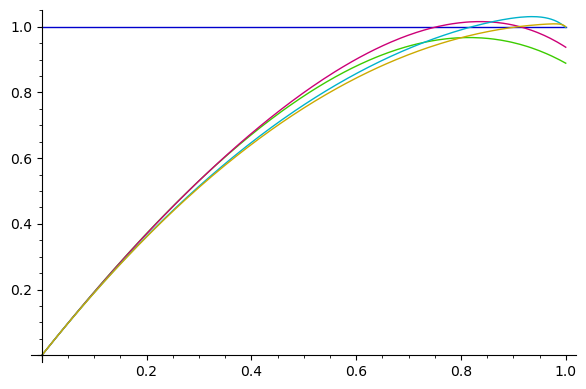

In [12]:
var('s')
gam=gamma(2,s,2)
plot([1,G(2,2,s,gam),G(3,2,s,gam),G(20,2,s,gam),G(100,2,s,gam)],(0,1))

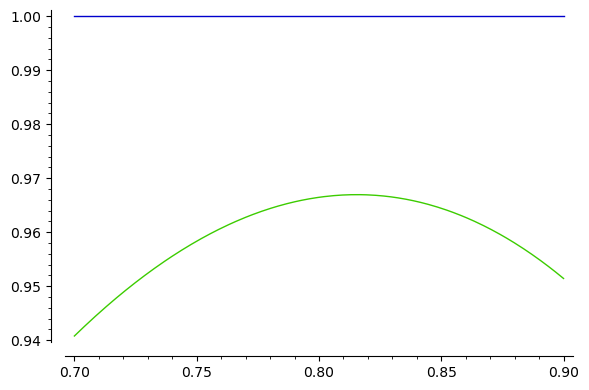

In [13]:
var('s')
gam=gamma(2,s,2)
plot([1,G(2,2,s,gam)],(0.7,0.9))

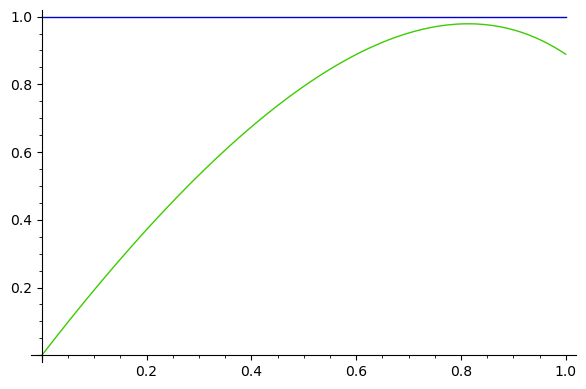

In [14]:
var('s')
gam=gamma(2,s,4)
plot([1,G(2,2,s,gam)],(0,1))

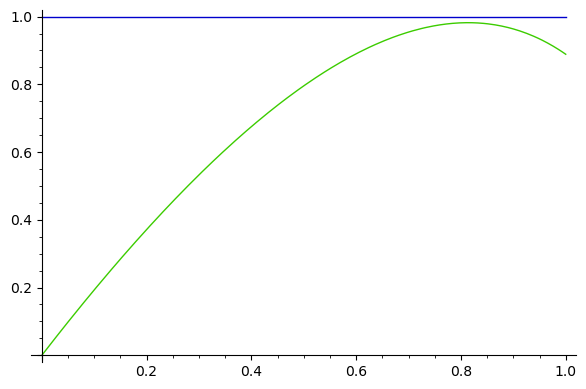

In [15]:
var('s')
gam=gamma(2,s,5)
plot([1,G(2,2,s,gam)],(0,1))

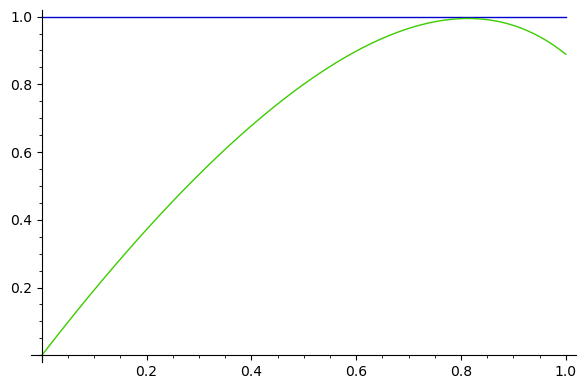

In [16]:
var('s')
gam=gamma(2,s,20)
plot([1,G(2,2,s,gam)],(0,1))

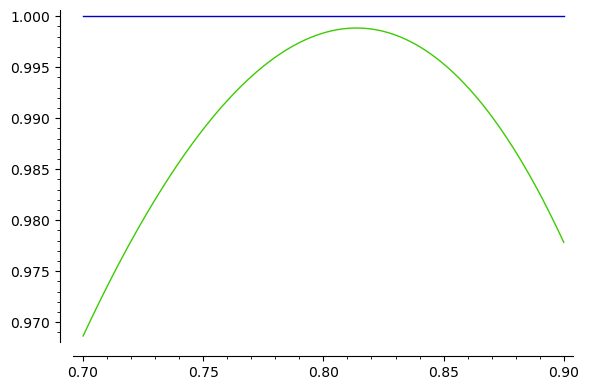

In [17]:
var('s')
gam=gamma(2,s,100)
plot([1,G(2,2,s,gam)],(0.7,0.9))

In [18]:
def H(d,s):
    gam=gamma(2,s,2)
    a=G(d,2,s,gam)
    return ln(a)

In [19]:
def S(d):
    (a,b)=find_local_maximum(lambda s: H(d,s),0,1)
    #print(a,b)
    return b

In [20]:
S(3)

0.8363036765178729

In [21]:
a=S(3)

for d in range(4,100):
    b=S(d)
    print(d, H(3,a)*H(d,b)-H(3,b)*H(d,a))

4 3.2301492333030994e-05
5 0.00011886459108614866
6 0.0002262100128273001
7 0.00033068028380317543
8 0.0004210698943585241
9 0.0004936176692552592
10 0.0005483214160074801
11 0.0005868499412984712
12 0.000611457794357242
13 0.0006244542996132004
14 0.0006279656363316715
15 0.0006238463791372387
16 0.0006136643956301416
17 0.0005987204527033599
18 0.0005800799080981728
19 0.000558608029767004
20 0.000535003593834344
21 0.0005098283294691951
22 0.0004835323192356578
23 0.00045647527283408217
24 0.0004289437167861766
25 0.0004011653388445176
26 0.00037332043122124774
27 0.00034555115380416004
28 0.000317969000803594
29 0.00029066083213405436
30 0.0002636937075823551
31 0.00023711864942830115
32 0.00021097394096984318
33 0.00018528751407210822
34 0.0001600789163654837
35 0.0001353612847722334
36 0.00011114214558429928
37 8.742499947917459e-05
38 6.420960513143503e-05
39 4.149351086824211e-05
40 1.9271559379715575e-05
41 -2.46253949806e-06
42 -2.3716696412334878e-05
43 -4.44997189234365e-05

In [22]:
for d in range(2,40):
    print(d,S(d),H(d,S(d)))

2 0.815455702957866 -0.033600603156157684
3 0.8363036765178729 0.01535068191646292
4 0.8525333417517503 0.033729345993037105
5 0.8654294789451883 0.0411974906944597
6 0.8759265016986897 0.04402807388965576
7 0.8846540657771119 0.04468430539888605
8 0.8920411140363623 0.04426664186678859
9 0.8983876355479397 0.04331111242016751
10 0.903909221061341 0.04209477062934047
11 0.9087647553225551 0.04076658777847432
12 0.913073992743368 0.039408512502826315
13 0.9169289781601722 0.03806588996729563
14 0.920401711924138 0.03676342609587465
15 0.9235493857798135 0.0355139227164028
16 0.9264180103901093 0.034323220327498336
17 0.9290451211393895 0.033193070948380275
18 0.9314616252412855 0.03212284316849847
19 0.9336932230197637 0.03111054984473098
20 0.9357615071059009 0.03015347373668605
21 0.9376847325708904 0.029248549900646556
22 0.939478445081666 0.028392598658682947
23 0.9411560252697401 0.02758246569712311
24 0.9427289842565906 0.026815103981910966
25 0.944207326270238 0.02608761907921920

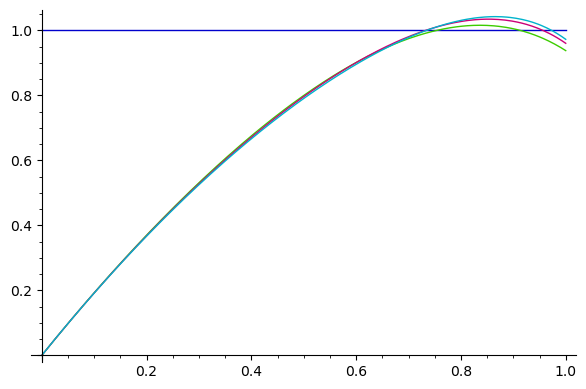

In [23]:
plot([1,exp(H(3,s)),exp(H(4,s)),exp(H(5,s))],(0,1))

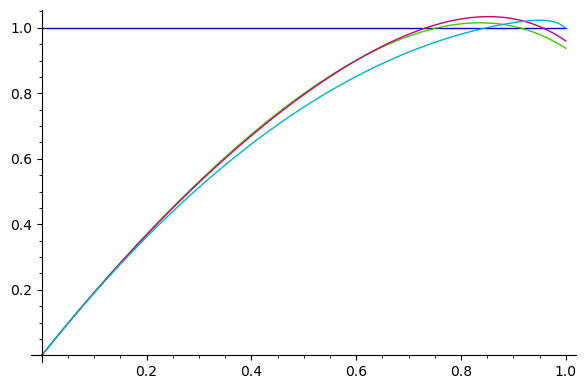

In [24]:
plot([1,exp(H(3,s)),exp(H(4,s)),exp(H(30,s))],(0,1))

In [25]:
for d in range(1,100):
    print(d, (G(d,2,1-1/(d+1),1-1/(d+1))).n(),(1+1/(2*d)).n())

1 0.656250000000000 1.50000000000000
2 0.883401920438957 1.25000000000000
3 0.964416503906250 1.16666666666667
4 0.998871040000000 1.12500000000000
5 1.01509164396306 1.10000000000000
6 1.02310544029293 1.08333333333333
7 1.02706034306902 1.07142857142857
8 1.02887371360873 1.06250000000000
9 1.02950726562810 1.05555555555556
10 1.02947397916878 1.05000000000000
11 1.02906060770928 1.04545454545455
12 1.02843325047637 1.04166666666667
13 1.02769067996391 1.03846153846154
14 1.02689269656607 1.03571428571429
15 1.02607586048836 1.03333333333333
16 1.02526253720572 1.03125000000000
17 1.02446625720005 1.02941176470588
18 1.02369497358260 1.02777777777778
19 1.02295308500783 1.02631578947368
20 1.02224271463590 1.02500000000000
21 1.02156453079664 1.02380952380952
22 1.02091827983560 1.02272727272727
23 1.02030313516168 1.02173913043478
24 1.01971792722161 1.02083333333333
25 1.01916129538320 1.02000000000000
26 1.01863178807936 1.01923076923077
27 1.01812792839074 1.01851851851852
28 1.0

In [26]:
var('d,t,k,s')
k=3
t=1/k^2
s=1-t

print(k+1,k^4-2*k^2-1)

for d in range(2,k^4):
    a=1-t^2+1/(d+1)*((1-t)^2-(1+t)*(1-t)^(d+1))-(1-t)^(d+2)/(d+1)^2
    b=1-1/(d+1)^2+d^2/(d+1)^2*t-1/2*d*(d+2)/(d+1)*t^2-1/2*d*t^3
    c=G(d,2,s,gamma(2,s,1))
    print(d,c.n(),a.n(),b.n())
    


4 62
2 0.944654404971865 0.921539738183543 0.920438957475994
3 0.998596263902386 0.977086826195194 0.974794238683128
4 1.02199721309537 1.00263065890663 0.998737997256516
5 1.03302832128784 1.01581572264238 1.00994513031550
6 1.03818106804715 1.02297793021263 1.01478122113043
7 1.04025822903728 1.02687547844172 1.01603223593964
8 1.04063039064108 1.02887371360873 1.01508916323731
9 1.04002829850295 1.02971312894777 1.01271604938272
10 1.03886633507523 1.02982336869823 1.00936412384224
11 1.03739008559849 1.02946678439253 1.00531550068587
12 1.03574964302448 1.02880997267439 1.00075486400273
13 1.03403855649044 1.02796195391867 0.995807788135830
14 1.03231567675900 1.02699571634357 0.990562414266118
15 1.03061796218352 1.02596094775571 0.985082304526749
16 1.02896826341933 1.02489185655631 0.979414375287757
17 1.02738019985600 1.02381213628974 0.973593964334705
18 1.02586129082101 1.02273820641716 0.967648165247427
19 1.02441500735111 1.02168137921320 0.961598079561042
20 1.023042138838

In [27]:
var('x')
print((((x^4-2*x^2+1)/(x^4-2*x^2)+(x^4-2*x^2-1)/(x^4-2*x^2)*1/x^2)*(1-1/x^2)).full_simplify())
print((((x^4-2*x^2+1)/(x^4-2*x^2)+(x^4-2*x^2-1)/(x^4-2*x^2)*1/x^2)).full_simplify())
print((((x^4-2*x^2+2)/(x^4-2*x^2+1)+(x^4-2*x^2)/(x^4-2*x^2+1)*1/x^2)*(1-1/x^2)).full_simplify())

(x^8 - 2*x^6 + 1)/(x^8 - 2*x^6)
(x^6 - x^4 - x^2 - 1)/(x^6 - 2*x^4)
1


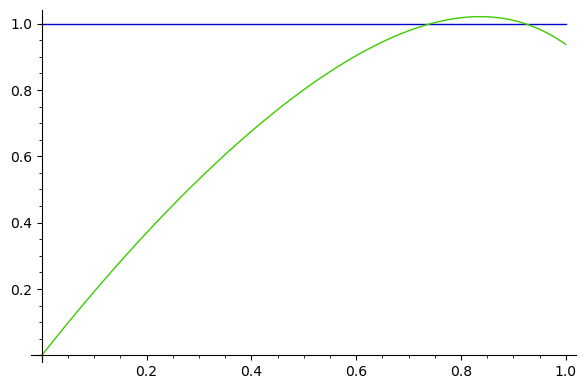

In [30]:
var('s')
plot([1,G(3,2,s,gamma(2,s,3))],s,0,1)

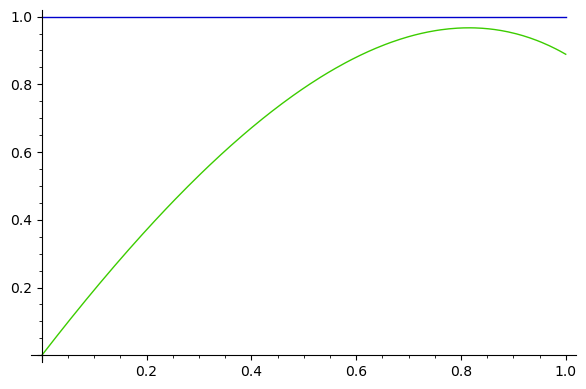

In [31]:
var('s')
plot([1,G(2,2,s,gamma(2,s,2))],s,0,1)

In [57]:
s=0.9226
for d in range(3,200):
    print(d, G(d,2,s,gamma(2,s,3)))

3 1.00004281898413
4 1.02355463439624
5 1.03502466003158
6 1.04075508431121
7 1.04344970711055
8 1.04442760659984
9 1.04439348807894
10 1.04374970047192
11 1.04273761365162
12 1.04150746526071
13 1.04015532343119
14 1.03874377034782
15 1.03731402209655
16 1.03589330906522
17 1.03449951824170
18 1.03314419440313
19 1.03183452598724
20 1.03057468526575
21 1.02936674789715
22 1.02821133266033
23 1.02710805158118
24 1.02605582949543
25 1.02505313243351
26 1.02409813155119
27 1.02318882101711
28 1.02232310271562
29 1.02149884685576
30 1.02071393498335
31 1.01996629008502
32 1.01925389719630
33 1.01857481701592
34 1.01792719437224
35 1.01730926291141
36 1.01671934702745
37 1.01615586179690
38 1.01561731148926
39 1.01510228708155
40 1.01460946309801
41 1.01413759401522
42 1.01368551041170
43 1.01325211499474
44 1.01283637860207
45 1.01243733624905
46 1.01205408327192
47 1.01168577160203
48 1.01133160619430
49 1.01099084162443
50 1.01066277886254
51 1.01034676222618
52 1.01004217651183
53 1.00

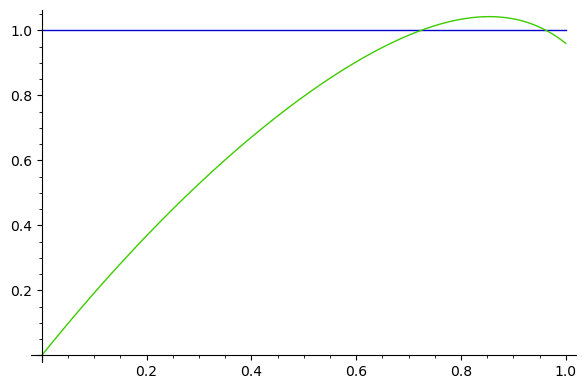

In [58]:
var('s')
plot([1,G(4,2,s,gamma(2,s,4))],s,0,1)

In [69]:
s=0.9622
for d in range(4,1000):
    print(d, G(d,2,s,gamma(2,s,4)))

4 1.00003563547974
5 1.01294458875230
6 1.02041420274202
7 1.02494672407281
8 1.02775710101448
9 1.02949498932524
10 1.03053411173685
11 1.03110210691047
12 1.03134412823960
13 1.03135625065942
14 1.03120405265022
15 1.03093345821599
16 1.03057732438273
17 1.03015958538336
18 1.02969793964745
19 1.02920563863319
20 1.02869270581097
21 1.02816678470284
22 1.02763373986313
23 1.02709808989403
24 1.02656332413122
25 1.02603213739513
26 1.02550660614337
27 1.02498832212390
28 1.02447849480782
29 1.02397803061581
30 1.02348759470710
31 1.02300765953425
32 1.02253854326020
33 1.02208044034322
34 1.02163344602267
35 1.02119757602015
36 1.02077278246150
37 1.02035896679519
38 1.01995599030919
39 1.01956368271751
40 1.01918184918725
41 1.01881027610003
42 1.01844873578173
43 1.01809699038827
44 1.01775479509818
45 1.01742190073426
46 1.01709805591346
47 1.01678300880603
48 1.01647650857031
49 1.01617830651766
50 1.01588815705264
51 1.01560581842558
52 1.01533105332867
53 1.01506362936114
54 1.0

954 0.999540614282723
955 0.999539600209205
956 0.999538588254963
957 0.999537578413361
958 0.999536570677789
959 0.999535565041667
960 0.999534561498439
961 0.999533560041580
962 0.999532560664590
963 0.999531563360996
964 0.999530568124352
965 0.999529574948240
966 0.999528583826267
967 0.999527594752066
968 0.999526607719298
969 0.999525622721650
970 0.999524639752832
971 0.999523658806585
972 0.999522679876670
973 0.999521702956879
974 0.999520728041026
975 0.999519755122951
976 0.999518784196520
977 0.999517815255624
978 0.999516848294178
979 0.999515883306122
980 0.999514920285423
981 0.999513959226069
982 0.999513000122075
983 0.999512042967480
984 0.999511087756345
985 0.999510134482759
986 0.999509183140831
987 0.999508233724696
988 0.999507286228513
989 0.999506340646465
990 0.999505396972755
991 0.999504455201613
992 0.999503515327291
993 0.999502577344064
994 0.999501641246231
995 0.999500707028112
996 0.999499774684052
997 0.999498844208417
998 0.999497915595596
999 0.9994

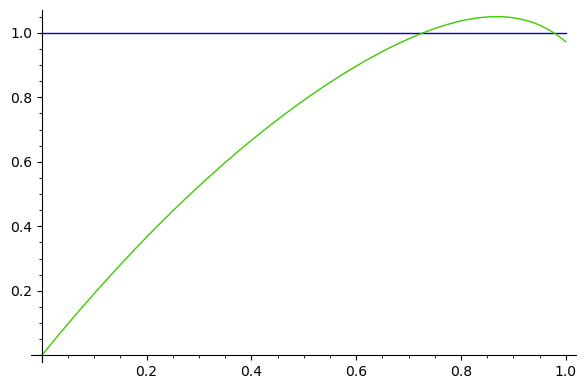

In [70]:
var('s')
plot([1,G(5,2,s,gamma(2,s,5))],s,0,1)

In [81]:
s=0.9771
for d in range(5,1822):
    print(d, G(d,2,s,gamma(2,s,5)))

5 1.00001784739988
6 1.00775432411277
7 1.01266677063039
8 1.01592066684408
9 1.01813630336817
10 1.01966916984729
11 1.02073522159692
12 1.02147197111657
13 1.02197044469688
14 1.02229288645953
15 1.02248304816694
16 1.02257241809857
17 1.02258412585389
18 1.02253546576567
19 1.02243957168562
20 1.02230655507113
21 1.02214429478981
22 1.02195899565133
23 1.02175559015678
24 1.02153803195794
25 1.02130951324016
26 1.02107262782535
27 1.02082949499375
28 1.02058185450509
29 1.02033114024825
30 1.02007853785447
31 1.01982503015236
32 1.01957143331617
33 1.01931842582586
34 1.01906657182848
35 1.01881634010472
36 1.01856811956005
37 1.01832223194839
38 1.01807894237794
39 1.01783846802832
40 1.01760098541711
41 1.01736663648332
42 1.01713553370104
43 1.01690776439421
44 1.01668339439015
45 1.01646247112364
46 1.01624502628206
47 1.01603107806623
48 1.01582063312774
49 1.01561368823336
50 1.01541023169814
51 1.01521024462202
52 1.01501370195886
53 1.01482057344239
54 1.01463082438927
55 1.

973 1.00045579986653
974 1.00045479452308
975 1.00045379123975
976 1.00045279001024
977 1.00045179082822
978 1.00045079368744
979 1.00044979858163
980 1.00044880550459
981 1.00044781445010
982 1.00044682541200
983 1.00044583838415
984 1.00044485336041
985 1.00044387033469
986 1.00044288930091
987 1.00044191025304
988 1.00044093318504
989 1.00043995809091
990 1.00043898496468
991 1.00043801380040
992 1.00043704459214
993 1.00043607733400
994 1.00043511202010
995 1.00043414864458
996 1.00043318720160
997 1.00043222768537
998 1.00043127009009
999 1.00043031441000
1000 1.00042936063936
1001 1.00042840877246
1002 1.00042745880359
1003 1.00042651072709
1004 1.00042556453731
1005 1.00042462022863
1006 1.00042367779543
1007 1.00042273723214
1008 1.00042179853320
1009 1.00042086169307
1010 1.00041992670623
1011 1.00041899356719
1012 1.00041806227048
1013 1.00041713281065
1014 1.00041620518227
1015 1.00041527937992
1016 1.00041435539823
1017 1.00041343323183
1018 1.00041251287537
1019 1.00041159